## The Presence of Heart Disease

**Introduction:** 

The term “heart disease” refers to several types of heart conditions. Heart disease describes a range of conditions that affect your heart. These can include; blood vessel disease, coronary artery disease, Heart rhythm problems, congenital heart defects, heart valve disease, disease of the heart muscle, heart infection. The most common of these is coronary artery disease, which affects the blood flow to the heart that can result in heart attacks and heart failure. Heart disease is a leading cause of death for men, women or most racial and ethnics groups around the world. One person dies every 36 seconds in the USA from cardiovascular Disease. Risk of heart disease can be influenced by many factors include; age, high blood pressure, and high blood cholesterol levels. Growing older increases your risk of damaged and narrowed arteries and a weakened or thickened heart muscle and therefore individuals older in age are more likely to have heart disease. High blood cholesterol can increase the risk of plaque formation and atherosclerosis and in turn increase the likelihood of heart disease in an individual. Moreover, uncontrolled high blood pressure can result in hardening and thickening of your arteries, narrowing the vessels through which blood flows, increaseing an individual's likelihood of having heart disease. Additionally important symptoms to notice in individuals who have heart disease are the type of chest pain they are having, as angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood(feels like pressure or squeezing in your chest) and is a major symptom of heart disease. Furthermore, angina chest pain along with irregular heartbeats in an individual can strongly indicate that they might have heart disease. 

Due to age, high blood pressure, high cholesterol being major risk factors of heart disease and the type of chest pain along with irregular heart beats being an important symptom of heart disease we decided that these factors would best predict the presence of heart disease in an individual. 

**Can we use the age, blood pressure, and cholesterol levels, type of chest pain and heart rate of an individual to predict whether or not they have heart disease?**
 
This dataset shows information about several individuals that could contribute to heart disease, like blood pressure, chest pain, age, sex, blood sugar, heart rate, e.t.c, and whether or not they have heart disease. The goal of this database is to determine the presence of heart disease in a patient. This goal is represented by the POHD field, which refers to the presence of heart disease in an individual. It is an integer valued from 0 (no presence) to 4. Experiments with this database have focused on distinguishing presence of heart disease (a value from 1 through 4) from absence (0). In this database, sex is represented by integer values, with 0 representing female and 1 representing male. The serum_cholestoral field represents serum cholesterol in mg/dl. The chest_pain_type field is represented by integer values ranging from 1-4. A value of 1 indicates typical angina, 2 is atypical angina, 3 is non-anginal pain, and 4 is asymptomatic. 


***Load all libraries needed for data analysis**

It is important that you load all the libraries below inorder to ensure that all of the functions needed to preform the data analysis for heart disease are loaded into tidyverse. 

In [1]:
#load_libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
library(testthat)
library(digest)
library(cowplot)
library(GGally)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

**1) Load data for analysis**

Below we have read in all the datasets available to us using the same source of collecting this information, we then combined them together creating a larger data set with more data to use in our analysis. In each data set we converted the NA's in each column to question marks, to ensure that our data is usable and that our analysis does not lead to major errors. Additionally we created informative and readable column names to be able to determine what each comlumn represents and which column should be kept for our data analysis. 

In [13]:
set.seed(1234)
#We have read in and combined all datasets and tidied the data. 
#The NAs in the datasets are replaced with question marks.

cleveland_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
hungary_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
switzerland_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"
va_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"

cleveland_data <- read_csv(cleveland_url, col_names = FALSE, na = "?")
hungary_data <- read_csv(hungary_url, col_names = FALSE, na = "?")
switzerland_data <- read_csv(switzerland_url, col_names = FALSE, na = "?")
va_data <- read_csv(va_url, col_names = FALSE, na = "?")

heart_disease_data1 <- full_join(cleveland_data, hungary_data) %>%
    full_join(switzerland_data) %>%
    full_join(va_data)

colnames(heart_disease_data1) <- c("Age", "Sex", "chest_pain_type", "resting_blood_pressure", "serum_cholestorol", "fasting_blood_sugar", "resting_electrocardiographic_results",
                "maximum_heart_rate" , "exercise_induced_angina" , "oldpeak" , "slope" , "ca" , "thal" , "POHD")

head(heart_disease_data1)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
  X14 = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
  X14 = col_double()
)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_double(),
  X13 = col_double(),
 

Age,Sex,chest_pain_type,resting_blood_pressure,serum_cholestorol,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,ca,thal,POHD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


**2) Clean and wrangle data into a tidy format that can be used for the analysis**

In our data set, the presence of heart disease column (POHD) has been mutated with the purpose of  distinguishing the presence of heart disease (positive) from lack of heart disease (negative). We then selected the desired columns for our analysis which include; the factors we wish to use for our classification(age, chest pain type, serum cholesterol levels, resting blood pressure, maximum heart rate) along with the column we are trying to predict which is the presence of heart disease. We then remove the NA's in our data in order to clean the data to make it usable for our data analysis.

In [14]:
set.seed(1234)

POHD2 <- mutate(heart_disease_data1, Presence_of_Heart_Disease = ifelse(POHD>0, "P", "N"))

#select for desired columns
heart_data <- POHD2 %>%
                    select(Age, chest_pain_type, serum_cholestorol, Presence_of_Heart_Disease, resting_blood_pressure, maximum_heart_rate) %>%
                    mutate(Presence_of_Heart_Disease = as_factor(Presence_of_Heart_Disease))
#remove NAs
heart_disease_data1 <- na.omit(heart_data)
heart_disease_data1

Age,chest_pain_type,serum_cholestorol,Presence_of_Heart_Disease,resting_blood_pressure,maximum_heart_rate
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
63,1,233,N,145,150
67,4,286,P,160,108
67,4,229,P,120,129
⋮,⋮,⋮,⋮,⋮,⋮
54,4,333,P,127,154
55,4,223,P,122,100
62,2,254,P,120,93


**3) Split data into testing or training data**

Below we have set the seed when splitting our data to ensure that it is reproducible. We then split our data into training and testing data to ensure that we can determine how accurate our model is.

In [15]:
set.seed(1234)


heart_disease_split <- initial_split(heart_disease_data1, prop = 0.70, strata = Presence_of_Heart_Disease)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

heart_disease_train

Age,chest_pain_type,serum_cholestorol,Presence_of_Heart_Disease,resting_blood_pressure,maximum_heart_rate
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
63,1,233,N,145,150
67,4,286,P,160,108
67,4,229,P,120,129
⋮,⋮,⋮,⋮,⋮,⋮
46,4,310,P,134,126
54,4,333,P,127,154
55,4,223,P,122,100


**4) Summarize the data into tables that are relevant to our analysis**

Below we have summarized our data into two tables. The first table below summarizes the total number of variables corresponding to positive and negative heart disease in our data. The second table summarizes the average of each column that we are using in our data analysis.


In [16]:
#useful Tables 
set.seed(1234)


summerized_POHD <- heart_disease_train %>%
    group_by(Presence_of_Heart_Disease) %>%
    summarize("Number of variable"= n()) 

mean_variables <- summarize(heart_disease_train,
                           "Mean Age" = mean(Age),
                           "Mean serum cholestoral" = mean(serum_cholestorol),
                           "Mean Chest Pain Type" = mean(chest_pain_type),
                           "Mean Resting Blood Pressure" = mean(resting_blood_pressure), 
                           "Mean maximum heart rate" = mean(maximum_heart_rate)) 
summerized_POHD
mean_variables

`summarise()` ungrouping output (override with `.groups` argument)



Presence_of_Heart_Disease,Number of variable
<fct>,<int>
N,262
P,323


Mean Age,Mean serum cholestoral,Mean Chest Pain Type,Mean Resting Blood Pressure,Mean maximum heart rate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
52.78291,197.2325,3.261538,131.3744,137.9812


The first table shows the number of rows that correspond to positive and negative POHD values. We can use this summary to see that we have similar numbers of positive and negative values for heart disease presence; therefore, upsampling is not needed. 

The second table shows the mean values of our predictors, which can be useful in determining the average of each factor in the population. This can allow you to make the inference that if an individual's observations greatly differ from the averages of the population that they may be at a greater risk of heart disease. 

**5) Created a recipe and scaled our data**

Below we created a recipe for our data and scaled our predictors to make sure that they were of equal importance when performing our data analysis. We then applied this recipe to our data set.

In [17]:
#scaled Data 
set.seed(1234)


heart_disease_recipe <- recipe(Presence_of_Heart_Disease ~ Age + serum_cholestorol + chest_pain_type + resting_blood_pressure + maximum_heart_rate, data = heart_disease_train ) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) 
heart_disease_scaled <- heart_disease_recipe %>%
        prep() %>%
        bake(heart_disease_train) 

**6) Created visualization of our analyis**

Below we created histograms to visulize the relationship between our factors and the presence of heart disease in an individual. 

Warning message:
“Removed 14 rows containing missing values (geom_bar).”


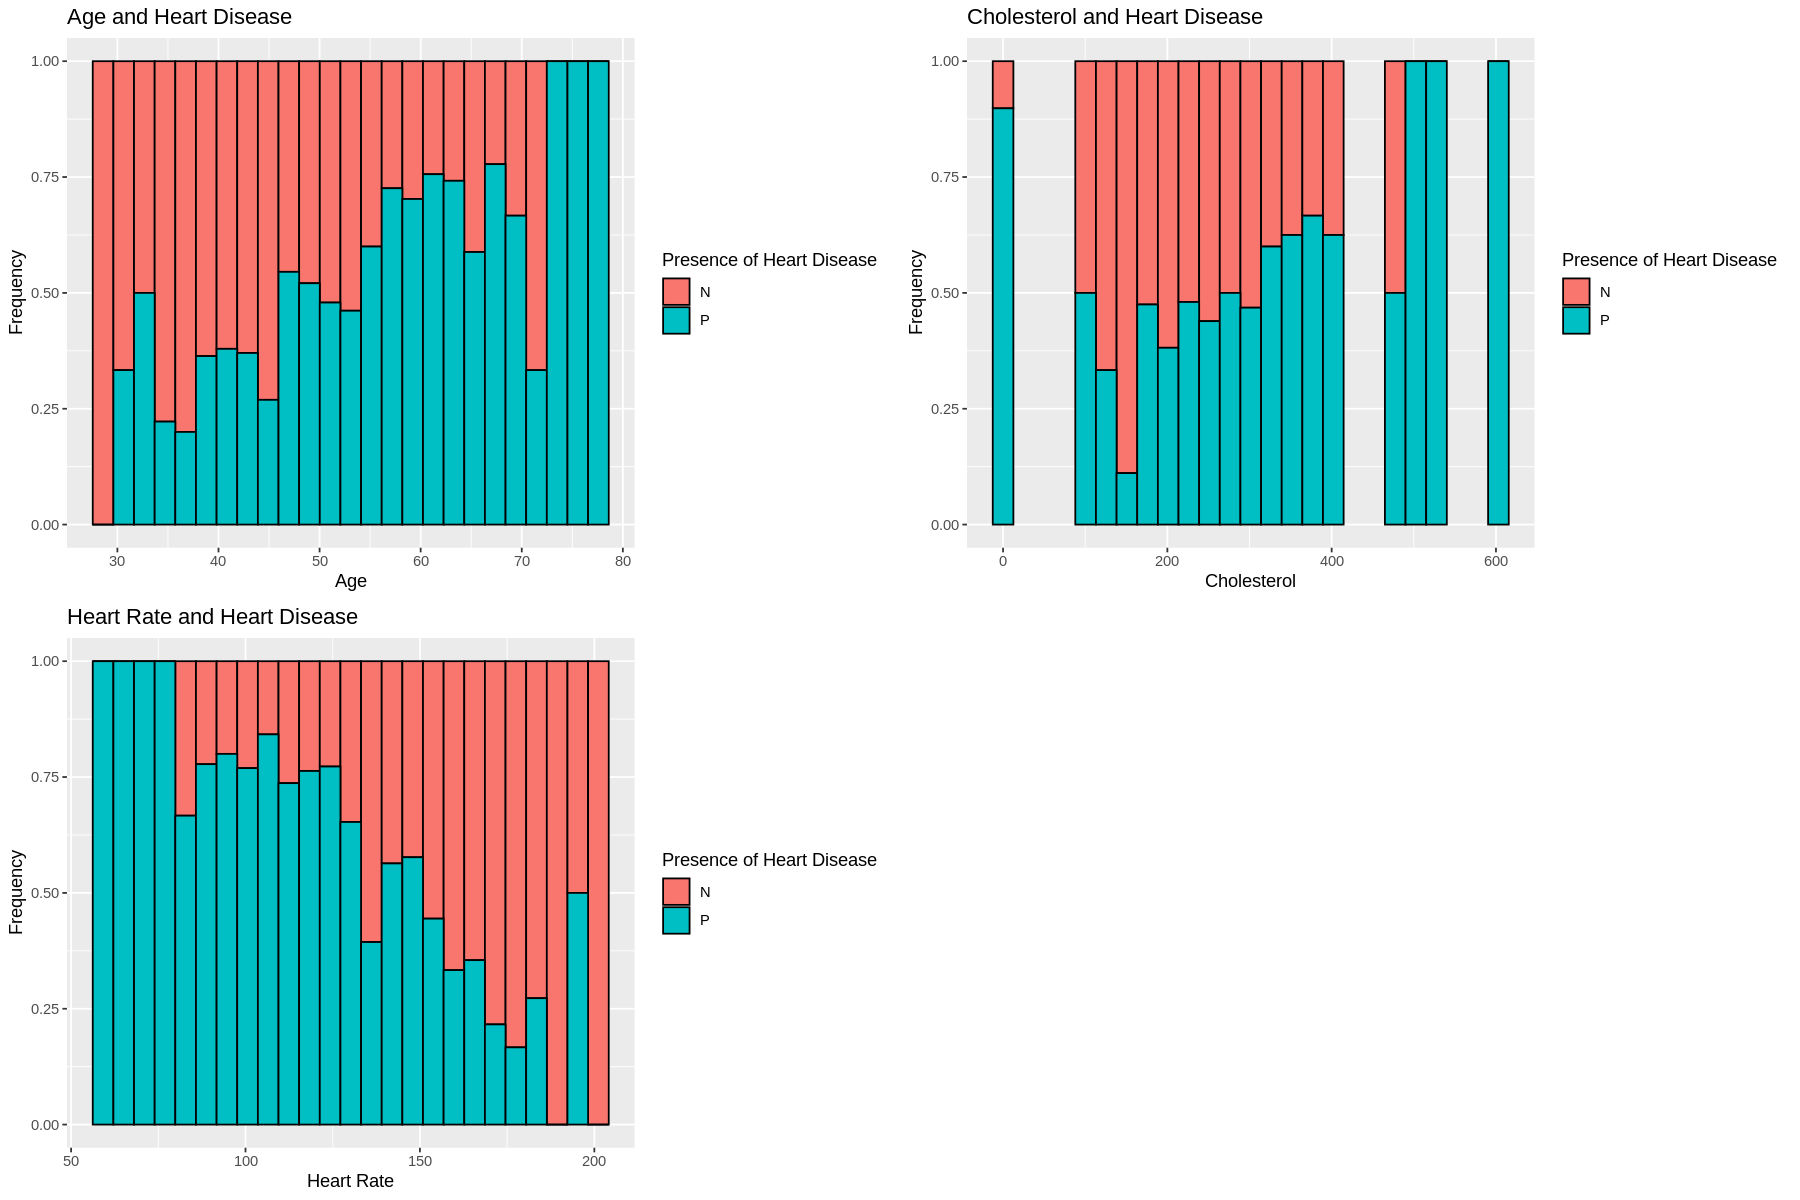

In [18]:
options(repr.plot.width = 15, repr.plot.height = 10)
set.seed(1234)


plot_a <- heart_disease_train %>%
    ggplot(aes(x = Age, fill = Presence_of_Heart_Disease)) + 
    geom_histogram(position = 'fill', color = "black", bins = 25) + 
    xlab("Age") +
    ylab("Frequency") +
    labs(fill = "Presence of Heart Disease") +
    ggtitle("Age and Heart Disease") 

plot_b <- heart_disease_train %>%
   ggplot(aes(x = serum_cholestorol, fill = Presence_of_Heart_Disease)) + 
   geom_histogram(position = 'fill', color = "black", bins = 25) + 
   xlab("Cholesterol") +
   ylab("Frequency") +
   labs(fill = "Presence of Heart Disease") +
   ggtitle("Cholesterol and Heart Disease") 

plot_c <- heart_disease_train %>%
   ggplot(aes(x = maximum_heart_rate, fill = Presence_of_Heart_Disease)) + 
   geom_histogram(position = 'fill', color = "black", bins = 25) + 
   xlab("Heart Rate") +
   ylab("Frequency") +
   labs(fill = "Presence of Heart Disease") +
   ggtitle("Heart Rate and Heart Disease") 

plot_grid(plot_a, plot_b, plot_c)

**_Interpretations_**

Histograms are used to visualize our data. These graphs show the relationship between our predictors and presence of heart disease. This lets us clearly see how each predictor impacts risk of heart disease. The predictor values have been scaled to ensure that all observations will be on a comparable scale. The plots show that age, cholesterol, and heart rate are good predictors.


# Data Analyis 

**1) need something here to explain this step...**

a) First we created a nearest_neighbors model specification, with neighbors = tune() so we are able to determine which value of k creates the most accurate model and weight_func = "rectangular" as the model we want to fit.

b) Next we split out overall trainging data into evenly-sized validation sets used to evaluate the best k value. We used folds for our evaluation.

c) Using the tibble function we created a data frame with a neighbors variable that contains the sequence of values of k to try. Here we are testing values from 1-30.

d)We first add our model and recipe to a workflow 
   
   i) then we we use tune_grid function to fit the model for a range of values,  and in the grid argument we specify the range of k values that we pre-determined in step c.
   
   ii) we use the collect_metrics functionu to aggregate the mean and standard error of the classifiers validation accuracy across the folds.
   
   iii) when then filter for the accuracy listed under the .metric column
   
**We then created have created a table below with the k values and thier accuracies inorder for us to determine which k value to use.**

In [19]:
# a) created a nearest_neighbor model
set.seed(1234)


knn_model <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

#b created a validation sets
heart_disease_vfold <- vfold_cv(heart_disease_train, v=5, strata = Presence_of_Heart_Disease)
                              
#c creating a data table with possible k values
k_vals <- tibble(neighbors = seq(from=1, to=30))

#d these steps together in a workflow and compute the accuracy of 
Heart_disease_predictions <- workflow() %>%
    add_recipe(heart_disease_recipe) %>%
    add_model(knn_model) %>%
    tune_grid(resample = heart_disease_vfold, grid = k_vals) %>%
    collect_metrics() %>% 
    filter(.metric == "accuracy")

Heart_disease_predictions

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7093845,5,0.004819086,Model01
2,accuracy,binary,0.7093845,5,0.004819086,Model02
3,accuracy,binary,0.7452552,5,0.005422014,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,accuracy,binary,0.7845445,5,0.0170858,Model28
29,accuracy,binary,0.7811109,5,0.0188203,Model29
30,accuracy,binary,0.7811109,5,0.0188203,Model30


**_2) We now need to pick the best k value to use in our data analysis_**

***below is a graph of the possible k values against the accurcy of each one**

We can visually determine from this graph that k value with those most accuracy is roughly between 11 and 12. 

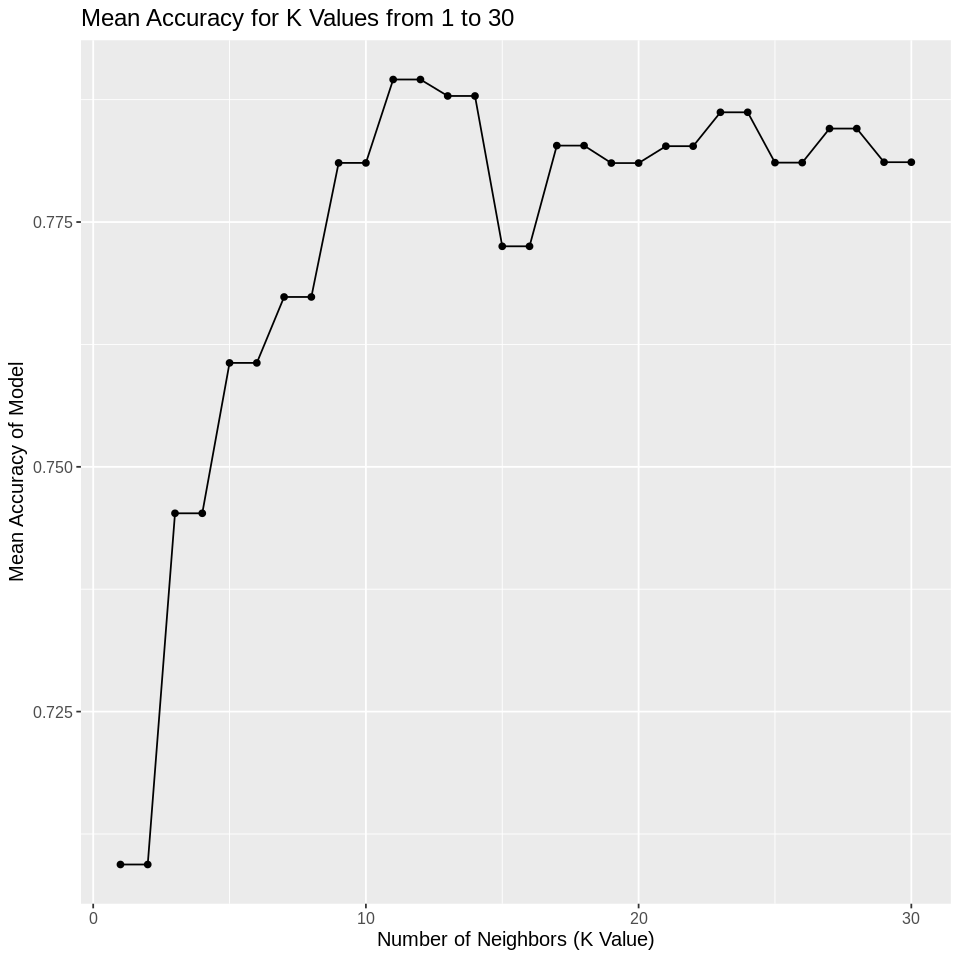

In [27]:
options(repr.plot.width = 8, repr.plot.height = 8)
set.seed(1234)


k_value_plot <- Heart_disease_predictions %>%
ggplot(aes(x=neighbors, y=mean)) +
geom_point()+
geom_line()+
labs(x="Number of Neighbors (K Value)", y="Mean Accuracy of Model")+
ggtitle("Mean Accuracy for K Values from 1 to 30")+
theme(text=element_text(size=12))
k_value_plot

In [28]:
#picking best k value
set.seed(1234)


best_k_value <- Heart_disease_predictions %>%
    arrange(desc(mean)) %>%
    slice(1)%>%
    pull(neighbors)

best_k_value

[1] 11

In [29]:
#accuracy of k value
set.seed(1234)


mean_accuracy_best_k <- Heart_disease_predictions %>%
    filter(neighbors == "11")%>%
    pull(mean)*100
mean_accuracy_best_k

[1] 78.9556

Model Specification with the best value of $K$ 

In [24]:
#create model
set.seed(1234)


#recipe 
heart_disease_recipe <- recipe(Presence_of_Heart_Disease ~ Age + serum_cholestorol + chest_pain_type + resting_blood_pressure + maximum_heart_rate, data = heart_disease_train ) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) 
heart_disease_scaled <- heart_disease_recipe %>%
        prep() %>%
        bake(heart_disease_train) 

#model

knn_best_model <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_value) %>%
    set_engine("kknn")%>%
    set_mode("classification") 

#pass the model specification and the training data set to the fit() function. 
heart_disease_fit <- workflow() %>%
    add_recipe(heart_disease_recipe) %>%
    add_model(knn_best_model) %>%
    fit(heart_disease_train)


#Evalute accuracy
heart_disease_testing_model <- heart_disease_fit %>%
    predict(heart_disease_test) %>%
    bind_cols(heart_disease_test) %>%
    metrics(truth = Presence_of_Heart_Disease, estimate = .pred_class) %>%
    filter(.metric == "accuracy")

heart_disease_fit 

heart_disease_testing_model

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~best_k_value,     kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2188034
Best kernel: rectangular
Best k: 11

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7991968


In [25]:
#accuracy of model
set.seed(1234)

percent_accuracy <- heart_disease_testing_model%>%
    pull(.estimate)*100
percent_accuracy

[1] 79.91968

Predicting on test dataset and report accuracy and confusion matrix

In [26]:
set.seed(1234)


heart_predictions <- predict(heart_disease_fit, heart_disease_test) %>%
      bind_cols(heart_disease_test)
heart_predictions

heart_metrics <- heart_predictions %>%
        metrics(truth = Presence_of_Heart_Disease, estimate = .pred_class)    
heart_metrics

heart_conf_mat <- heart_predictions %>%
        conf_mat(truth = Presence_of_Heart_Disease, estimate = .pred_class)    
heart_conf_mat

.pred_class,Age,chest_pain_type,serum_cholestorol,Presence_of_Heart_Disease,resting_blood_pressure,maximum_heart_rate
<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
N,56,2,236,N,120,178
P,63,4,254,P,130,147
N,56,3,256,P,130,142
⋮,⋮,⋮,⋮,⋮,⋮,⋮
N,68,3,254,N,134,151
P,53,4,300,P,144,128
N,62,2,254,P,120,93


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7991968
kap,binary,0.5914550


          Truth
Prediction   N   P
         N  83  22
         P  28 116

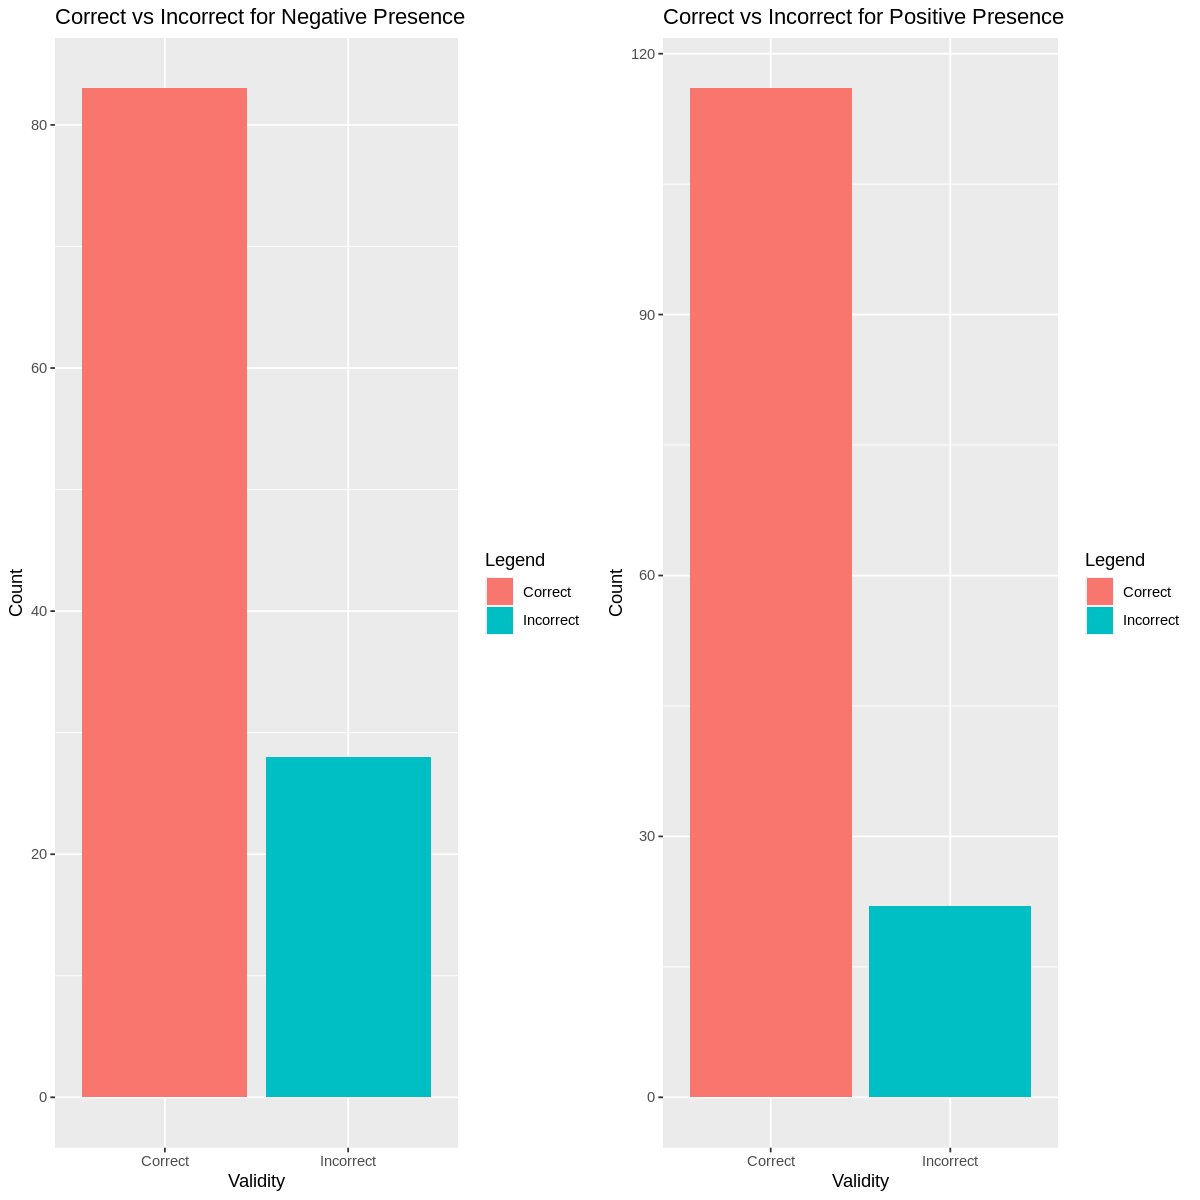

In [82]:
options(repr.plot.width = 10, repr.plot.height = 10)
set.seed(1234)

measurement_func <- function(df) {
    validity_N <- c()
    index_N <- c()
    validity_P <- c()
    index_P <- c()
    for(i in 1:nrow(df)) {
        if((slice(df['Presence_of_Heart_Disease'], i) == "N")) {
            if(slice(df['.pred_class'], i) == "N") {
                validity_N <- c(validity_N, "Correct")
                index_N <- c(index_N, (length(index_N)+1))
            } else {
                validity_N <- c(validity_N, "Incorrect")
                index_N <- c(index_N, (length(index_N)+1))
            }
        } else {
            if(slice(df['.pred_class'], i) == "P") {
                validity_P <- c(validity_P, "Correct")
                index_P <- c(index_P, (length(index_P)+1))
            } else {
                validity_P <- c(validity_P, "Incorrect")
                index_P <- c(index_P, (length(index_P)+1))
            }
        }
    }
    return(list("df1" = data.frame(index_N, validity_N), "df2" = data.frame(index_P, validity_P)))
}

data <- measurement_func(heart_predictions)

graphN <- ggplot(data$df1, aes(x = validity_N, fill = validity_N)) + geom_bar() + labs(x = "Validity", y = "Count", fill = "Legend") + ggtitle("Correct vs Incorrect for Negative Presence")


graphP <- ggplot(data$df2, aes(x = validity_P, fill= validity_P)) + geom_bar() + labs(x = "Validity", y = "Count", fill = "Legend") + ggtitle("Correct vs Incorrect for Positive Presence")


plot_grid(graphN, graphP)

**Methods:**

We will be using classification for this data analysis. We have already standardized the data by centering and scaling it. Next we will create the K-nearest neighbour model specification, then we will create a new recipe that centres and scales the predictors, using all predictors. We will combine this with the first recipe in a workflow and fit it to the dataset. 
We will then perform a cross-validation on the training data, create a workflow analysis with our recipe and model specification, collect metrics from the workflow analysis, and plot the k vs the accuracy to find the best value of k to maximize accuracy. 
Then we will build our final model with the predetermined best value for k, pass the model specification and the training data set to the fit() function, use our final model to predict on the test dataset, and report the confusion matrix.

We are using the columns Age, Chest pain type, Serum Cholesterol, Resting blood pressure, and POHD. 

Histograms are used to visualize our data. These graphs show the relationship between our predictors and presence of heart disease. This lets us clearly see how each predictor impacts risk of heart disease. The predictor values have been scaled to ensure that all observations will be on a comparable scale. The plots show that age, cholesterol, and heart rate are good predictors.


**Expected Outcomes and Significance:**

We expect to find out how well our predictors can determine whether or not an individual has heart disease. Our findings could help determine what factors correlate to higher risk of heart disease, allowing for earlier prevention and treatment for factors that increase risk of heart disease. This could lead us to question how big of a role genetics plays in the development of heart disease as well as how other factors, such as drug use and obesity could impact risk of developing heart disease.
